# An Analysis Rent Affordability in Culver City, California
### By Sharon Ghalchi

In this workbook, I analyze the affordability of rent in Culver City by census track. The data set I used is called *Gross Rent as a Percentage of Household Income* and can be found [here](https://censusreporter.org/data/table/?table=B25070&geo_ids=140%7C16000US0617568&primary_geo_id=16000US0617568). If we were just looking at rent prices alone, we would not be able to truly understand the affordability of rent pricing in the area because we would not know what households would be able to afford. However, if we look at the gross rent as a percentage of household income, we get a better look into how affordable rent is for household in proportion to their income and what they can afford. Generally, gross rent is labeled affordable when it is less than 30% of household income. Let's take a look into how affordable rent in the different census tracks of Culver City truly is.  


## 1. Importing Data 

**1a:** First, I need to import applicable libraries so that my notebook is prepped to read the data I import.

In [1]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

In [2]:
grd = gpd.read_file('Data/acs2019_5yr_B25070_14000US06037702501.geojson')

## 2. Preliminary Exploration

I wanna get an idea of what my data looks like

In [3]:
# the number of rows and columns 
grd.shape

(9, 25)

In [4]:
# the data type
type(grd)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

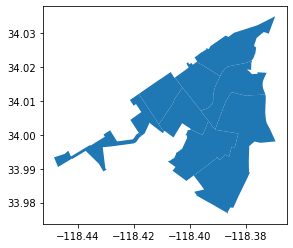

In [5]:
# the shape
grd.plot()

In [6]:
# what does my data table look like?
grd.head()

,geoid,name,B25070001,"B25070001, Error",B25070002,"B25070002, Error",B25070003,"B25070003, Error",B25070004,"B25070004, Error",...,"B25070007, Error",B25070008,"B25070008, Error",B25070009,"B25070009, Error",B25070010,"B25070010, Error",B25070011,"B25070011, Error",geometry
0,14000US06037702400,"Census Tract 7024, Los Angeles, CA",1411.0,118.0,54.0,57.0,138.0,56.0,195.0,100.0,...,67.0,101.0,57.0,35.0,45.0,409.0,108.0,116.0,65.0,"MULTIPOLYGON (((-118.39748 34.02341, -118.3970..."
1,14000US06037702501,"Census Tract 7025.01, Los Angeles, CA",900.0,192.0,50.0,51.0,124.0,95.0,155.0,68.0,...,86.0,16.0,25.0,53.0,53.0,41.0,37.0,26.0,38.0,"MULTIPOLYGON (((-118.40522 34.01703, -118.4050..."
2,14000US06037702502,"Census Tract 7025.02, Los Angeles, CA",761.0,241.0,82.0,82.0,51.0,51.0,47.0,73.0,...,98.0,13.0,21.0,85.0,80.0,102.0,103.0,11.0,22.0,"MULTIPOLYGON (((-118.39615 34.00715, -118.3958..."
3,14000US06037702600,"Census Tract 7026, Los Angeles, CA",556.0,147.0,0.0,17.0,43.0,44.0,109.0,74.0,...,45.0,70.0,62.0,47.0,49.0,108.0,85.0,47.0,47.0,"MULTIPOLYGON (((-118.40786 33.99212, -118.4077..."
4,14000US06037702700,"Census Tract 7027, Los Angeles, CA",321.0,80.0,9.0,15.0,63.0,47.0,49.0,43.0,...,13.0,58.0,51.0,25.0,24.0,45.0,32.0,8.0,12.0,"MULTIPOLYGON (((-118.41108 34.00312, -118.4109..."


## 3. Overwriting Default Display Settings
I want to make sure I can see all my rows and columns when asked, so I will override the python settings. 

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
#let's check to make sure we can see all the columns now
grd.sample()

,geoid,name,B25070001,"B25070001, Error",B25070002,"B25070002, Error",B25070003,"B25070003, Error",B25070004,"B25070004, Error",B25070005,"B25070005, Error",B25070006,"B25070006, Error",B25070007,"B25070007, Error",B25070008,"B25070008, Error",B25070009,"B25070009, Error",B25070010,"B25070010, Error",B25070011,"B25070011, Error",geometry
1,14000US06037702501,"Census Tract 7025.01, Los Angeles, CA",900.0,192.0,50.0,51.0,124.0,95.0,155.0,68.0,198.0,107.0,129.0,85.0,108.0,86.0,16.0,25.0,53.0,53.0,41.0,37.0,26.0,38.0,"MULTIPOLYGON (((-118.40522 34.01703, -118.4050..."


## 4. Data Types
I want to see what my data types are

In [9]:
grd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             9 non-null      object  
 1   name              9 non-null      object  
 2   B25070001         9 non-null      float64 
 3   B25070001, Error  9 non-null      float64 
 4   B25070002         9 non-null      float64 
 5   B25070002, Error  9 non-null      float64 
 6   B25070003         9 non-null      float64 
 7   B25070003, Error  9 non-null      float64 
 8   B25070004         9 non-null      float64 
 9   B25070004, Error  9 non-null      float64 
 10  B25070005         9 non-null      float64 
 11  B25070005, Error  9 non-null      float64 
 12  B25070006         9 non-null      float64 
 13  B25070006, Error  9 non-null      float64 
 14  B25070007         9 non-null      float64 
 15  B25070007, Error  9 non-null      float64 
 16  B25070008         9 no

I personally chose the census tracks in Culver City before I downloaded my data, so I know that all the data is the same scale. However, if I was not sure, I could run the following code **grd.geoid.head()**.

## 5. Dropping Columns 
I see a lot of "Error" rows that I do not need, so I'm going to drop them.

In [10]:
# my existing columns
list(grd)

['geoid',
 'name',
 'B25070001',
 'B25070001, Error',
 'B25070002',
 'B25070002, Error',
 'B25070003',
 'B25070003, Error',
 'B25070004',
 'B25070004, Error',
 'B25070005',
 'B25070005, Error',
 'B25070006',
 'B25070006, Error',
 'B25070007',
 'B25070007, Error',
 'B25070008',
 'B25070008, Error',
 'B25070009',
 'B25070009, Error',
 'B25070010',
 'B25070010, Error',
 'B25070011',
 'B25070011, Error',
 'geometry']

In [11]:
# defining the columns to keep
columns_to_keep = ['geoid',
 'name',
 'B25070001',
 'B25070002',
 'B25070003',
 'B25070004',
 'B25070005',
 'B25070006',
 'B25070007',
 'B25070008',
 'B25070009',
 'B25070010',
 'B25070011',
 'geometry']

In [12]:
# redefining grd with only columns to keep
grd = grd[columns_to_keep]

In [13]:
# checking that the right columns were dropped
list(grd)

['geoid',
 'name',
 'B25070001',
 'B25070002',
 'B25070003',
 'B25070004',
 'B25070005',
 'B25070006',
 'B25070007',
 'B25070008',
 'B25070009',
 'B25070010',
 'B25070011',
 'geometry']

## 6. Renaming Columns
I want to rename the columns using the correct titles from the census data. Since the last code I ran was the list of columns names, I can just copy and paste the output and replace the current names with the ones I want.

In [14]:
grd.columns = ['geoid',
 'name',
 'Total',
 'Less than 10.0%',
 '10.0% to 14.9% ',
 '15.0% to 19.9%',
 '20.0% to 24.9%',
 '25.0% to 29.9%',
 '30.0% to 34.9%',
 '35.0% to 39.9%',
 '40.0% to 44.9%',
 '45.0% to 49.9%',
 '50.0% or more',
 'geometry']

In [15]:
# checking to make sure they were renamed
list(grd)

['geoid',
 'name',
 'Total',
 'Less than 10.0%',
 '10.0% to 14.9% ',
 '15.0% to 19.9%',
 '20.0% to 24.9%',
 '25.0% to 29.9%',
 '30.0% to 34.9%',
 '35.0% to 39.9%',
 '40.0% to 44.9%',
 '45.0% to 49.9%',
 '50.0% or more',
 'geometry']

In [16]:
grd.head()

,geoid,name,Total,Less than 10.0%,10.0% to 14.9%,15.0% to 19.9%,20.0% to 24.9%,25.0% to 29.9%,30.0% to 34.9%,35.0% to 39.9%,40.0% to 44.9%,45.0% to 49.9%,50.0% or more,geometry
0,14000US06037702400,"Census Tract 7024, Los Angeles, CA",1411.0,54.0,138.0,195.0,152.0,92.0,119.0,101.0,35.0,409.0,116.0,"MULTIPOLYGON (((-118.39748 34.02341, -118.3970..."
1,14000US06037702501,"Census Tract 7025.01, Los Angeles, CA",900.0,50.0,124.0,155.0,198.0,129.0,108.0,16.0,53.0,41.0,26.0,"MULTIPOLYGON (((-118.40522 34.01703, -118.4050..."
2,14000US06037702502,"Census Tract 7025.02, Los Angeles, CA",761.0,82.0,51.0,47.0,22.0,229.0,119.0,13.0,85.0,102.0,11.0,"MULTIPOLYGON (((-118.39615 34.00715, -118.3958..."
3,14000US06037702600,"Census Tract 7026, Los Angeles, CA",556.0,0.0,43.0,109.0,16.0,84.0,32.0,70.0,47.0,108.0,47.0,"MULTIPOLYGON (((-118.40786 33.99212, -118.4077..."
4,14000US06037702700,"Census Tract 7027, Los Angeles, CA",321.0,9.0,63.0,49.0,10.0,46.0,8.0,58.0,25.0,45.0,8.0,"MULTIPOLYGON (((-118.41108 34.00312, -118.4109..."


## 7. Double Checking Data Integrity
I want to make sure that I dropped and renamed the correct columns. I'm going to use a random record to make sure the math adds up and that the `Total` equals the rest of the column.

In [17]:
# getting a random record
random_tract = grd.sample()
random_tract

,geoid,name,Total,Less than 10.0%,10.0% to 14.9%,15.0% to 19.9%,20.0% to 24.9%,25.0% to 29.9%,30.0% to 34.9%,35.0% to 39.9%,40.0% to 44.9%,45.0% to 49.9%,50.0% or more,geometry
5,14000US06037702801,"Census Tract 7028.01, Los Angeles, CA",1311.0,27.0,98.0,169.0,36.0,132.0,220.0,98.0,120.0,411.0,0.0,"MULTIPOLYGON (((-118.41823 34.01211, -118.4179..."


I use the `iloc` command to get the value from the `Total` cell into the dataframe

In [18]:
# example usage of iloc to get the total population of our random record
# "for the 0th record, get the value in the Total column"
random_tract.iloc[0]['Total']

1311.0

In [19]:
# print this out in plain english
print('Total population: ' + str(random_tract.iloc[0]['Total']))

Total population: 1311.0


In [20]:
# I add up the percentile columns to make sure they equal the Total which is 1311.0
print(random_tract.iloc[0]['Less than 10.0%'] + 
      random_tract.iloc[0]['10.0% to 14.9% '] + 
      random_tract.iloc[0]['15.0% to 19.9%'] + 
      random_tract.iloc[0]['20.0% to 24.9%'] + 
      random_tract.iloc[0]['25.0% to 29.9%'] + 
      random_tract.iloc[0]['30.0% to 34.9%'] + 
      random_tract.iloc[0]['35.0% to 39.9%'] + 
      random_tract.iloc[0]['40.0% to 44.9%'] + 
      random_tract.iloc[0]['45.0% to 49.9%'] +
      random_tract.iloc[0]['50.0% or more'])

1311.0


The math adds up! We can move on. 

## 8. Normalizing Data
Currently, the numbers in my tables depict my raw data. The problem with raw data is that it's hard to truly compare and analyze. Thus, before I start to analyze my data, I want to normalize my data into percentages. This will make it easier to actually compare data between the different census tracks in Culver City. I want to convert my percentile columns from raw data into percent of total. 

In [21]:
# output columns
list(grd)

['geoid',
 'name',
 'Total',
 'Less than 10.0%',
 '10.0% to 14.9% ',
 '15.0% to 19.9%',
 '20.0% to 24.9%',
 '25.0% to 29.9%',
 '30.0% to 34.9%',
 '35.0% to 39.9%',
 '40.0% to 44.9%',
 '45.0% to 49.9%',
 '50.0% or more',
 'geometry']

In [22]:
# creating new columns, and populating them with normalized data to get the percent of total value
grd['Less than 10.0% of income'] = grd['Less than 10.0%']/grd['Total']*100
grd['10.0% to 14.9% of income'] = grd['10.0% to 14.9% ']/grd['Total']*100
grd['15.0% to 19.9% of income'] = grd['15.0% to 19.9%']/grd['Total']*100
grd['20.0% to 24.9% of income'] = grd['20.0% to 24.9%']/grd['Total']*100
grd['25.0% to 29.9% of income'] = grd['25.0% to 29.9%']/grd['Total']*100
grd['30.0% to 34.9% of income'] = grd['30.0% to 34.9%']/grd['Total']*100
grd['35.0% to 39.9% of income'] = grd['35.0% to 39.9%']/grd['Total']*100
grd['40.0% to 44.9% of income'] = grd['40.0% to 44.9%']/grd['Total']*100
grd['45.0% to 49.9% of income'] = grd['45.0% to 49.9%']/grd['Total']*100
grd['50.0% or more of income'] = grd['50.0% or more']/grd['Total']*100

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [23]:
# checking to see if it worked
grd.sample()

,geoid,name,Total,Less than 10.0%,10.0% to 14.9%,15.0% to 19.9%,20.0% to 24.9%,25.0% to 29.9%,30.0% to 34.9%,35.0% to 39.9%,40.0% to 44.9%,45.0% to 49.9%,50.0% or more,geometry,Less than 10.0% of income,10.0% to 14.9% of income,15.0% to 19.9% of income,20.0% to 24.9% of income,25.0% to 29.9% of income,30.0% to 34.9% of income,35.0% to 39.9% of income,40.0% to 44.9% of income,45.0% to 49.9% of income,50.0% or more of income
6,14000US06037702802,"Census Tract 7028.02, Los Angeles, CA",427.0,8.0,15.0,66.0,108.0,35.0,69.0,25.0,11.0,90.0,0.0,"MULTIPOLYGON (((-118.42133 34.01037, -118.4205...",1.873536,3.512881,15.456674,25.29274,8.196721,16.159251,5.854801,2.576112,21.077283,0.0


Using the sample, we can see that the new columns are there and that the percent of totals are listed below them. I manually checked to make sure the data in the new columns summed to 100 to double check the codes and the math. Now we can start analyzing and visualizing our data!


## 9. Filtering Data 
Now that I have all the data normalized, I want to visualize the distribution of each census tract using histograms. First, I must set the distribution columns. (these are all my new percent columns)

In [24]:
# Let's see the list of columns so I can just copy and paste from the list
list(grd)

['geoid',
 'name',
 'Total',
 'Less than 10.0%',
 '10.0% to 14.9% ',
 '15.0% to 19.9%',
 '20.0% to 24.9%',
 '25.0% to 29.9%',
 '30.0% to 34.9%',
 '35.0% to 39.9%',
 '40.0% to 44.9%',
 '45.0% to 49.9%',
 '50.0% or more',
 'geometry',
 'Less than 10.0% of income',
 '10.0% to 14.9% of income',
 '15.0% to 19.9% of income',
 '20.0% to 24.9% of income',
 '25.0% to 29.9% of income',
 '30.0% to 34.9% of income',
 '35.0% to 39.9% of income',
 '40.0% to 44.9% of income',
 '45.0% to 49.9% of income',
 '50.0% or more of income']

In [25]:
# Defining my desired columns
distribution_columns = ['Less than 10.0% of income',
 '10.0% to 14.9% of income',
 '15.0% to 19.9% of income',
 '20.0% to 24.9% of income',
 '25.0% to 29.9% of income',
 '30.0% to 34.9% of income',
 '35.0% to 39.9% of income',
 '40.0% to 44.9% of income',
 '45.0% to 49.9% of income',
 '50.0% or more of income']

In [26]:
# Checking to see it filtered correctly
columns_trimmed = grd[distribution_columns].copy()
columns_trimmed

,Less than 10.0% of income,10.0% to 14.9% of income,15.0% to 19.9% of income,20.0% to 24.9% of income,25.0% to 29.9% of income,30.0% to 34.9% of income,35.0% to 39.9% of income,40.0% to 44.9% of income,45.0% to 49.9% of income,50.0% or more of income
0,3.827073,9.780298,13.819986,10.772502,6.520198,8.433735,7.158044,2.480510,28.986534,8.221120
1,5.555556,13.777778,17.222222,22.000000,14.333333,12.000000,1.777778,5.888889,4.555556,2.888889
2,10.775296,6.701708,6.176084,2.890933,30.091984,15.637319,1.708279,11.169514,13.403417,1.445466
3,0.000000,7.733813,19.604317,2.877698,15.107914,5.755396,12.589928,8.453237,19.424460,8.453237
4,2.803738,19.626168,15.264798,3.115265,14.330218,2.492212,18.068536,7.788162,14.018692,2.492212
5,2.059497,7.475210,12.890923,2.745995,10.068650,16.781083,7.475210,9.153318,31.350114,0.000000
6,1.873536,3.512881,15.456674,25.292740,8.196721,16.159251,5.854801,2.576112,21.077283,0.000000
7,9.815242,10.623557,2.655889,6.466513,5.311778,12.355658,3.233256,12.240185,36.374134,0.923788
8,4.400000,7.200000,16.333333,16.733333,15.933333,1.666667,3.466667,6.266667,26.466667,1.533333


Now I want to create a box plot for each census track showing the distribution of the Gross Rent as a Percentage of Household Income 

In [27]:
# I look at the names of each column to identify my census tracks
grd['name']

0       Census Tract 7024, Los Angeles, CA
1    Census Tract 7025.01, Los Angeles, CA
2    Census Tract 7025.02, Los Angeles, CA
3       Census Tract 7026, Los Angeles, CA
4       Census Tract 7027, Los Angeles, CA
5    Census Tract 7028.01, Los Angeles, CA
6    Census Tract 7028.02, Los Angeles, CA
7    Census Tract 7028.03, Los Angeles, CA
8    Census Tract 7030.01, Los Angeles, CA
Name: name, dtype: object

In [28]:
# I name my new data sets for each census track
Census_Tract_702400 = columns_trimmed.iloc[0]
Census_Tract_702501 = columns_trimmed.iloc[1]
Census_Tract_702502 = columns_trimmed.iloc[2]
Census_Tract_702600 = columns_trimmed.iloc[3]
Census_Tract_702700 = columns_trimmed.iloc[4]
Census_Tract_702801 = columns_trimmed.iloc[5]
Census_Tract_702802 = columns_trimmed.iloc[6]
Census_Tract_702803 = columns_trimmed.iloc[7]
Census_Tract_703001 = columns_trimmed.iloc[8]

## 10. Distrubition Bar Plots 
Now I create bar plots for each census track in Culver City so I can visuluaze the distribution of the *Gross Rent as a Percentage of Household Income*. 

<AxesSubplot:title={'center':'Census_Tract_702400'}>

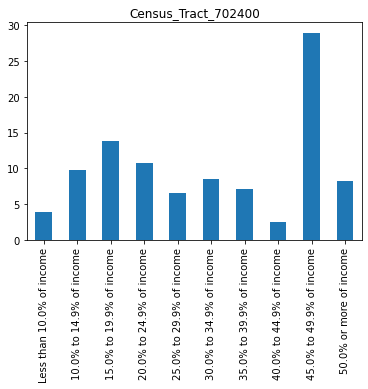

In [29]:
Census_Tract_702400.plot.bar(x='Percent of Income Spent on Gross Rent', y = 'Percent of Households', title = 'Census_Tract_702400')

<AxesSubplot:title={'center':'Census_Tract_702501'}>

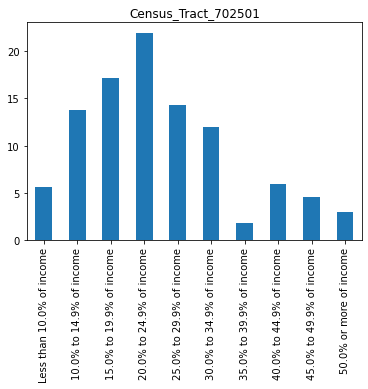

In [30]:
Census_Tract_702501.plot.bar(x='Percent of Income Spent on Gross Rent',
                             y = 'Percent of Households', title = 'Census_Tract_702501')

<AxesSubplot:title={'center':'Census_Tract_702600'}>

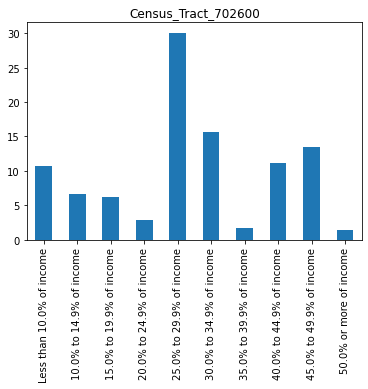

In [31]:
Census_Tract_702502.plot.bar(x='Percent of Income Spent on Gross Rent',
                             y = 'Percent of Households', title = 'Census_Tract_702600')

<AxesSubplot:title={'center':'Census_Tract_702700'}>

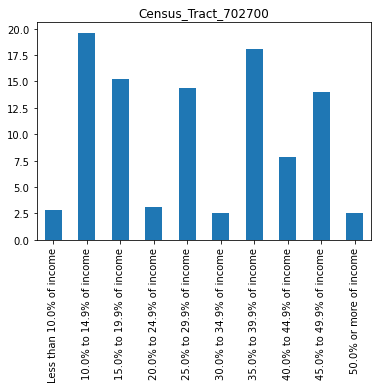

In [32]:
Census_Tract_702700.plot.bar(x='Percent of Income Spent on Gross Rent',
                             y = 'Percent of Households', title = 'Census_Tract_702700')

<AxesSubplot:title={'center':'Census_Tract_702801'}>

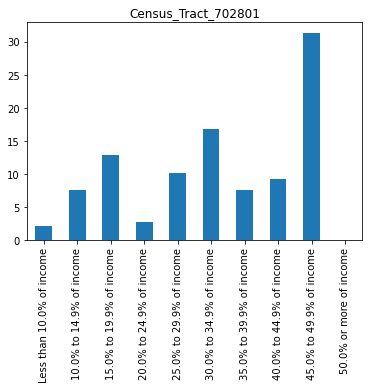

In [33]:
Census_Tract_702801.plot.bar(x='Percent of Income Spent on Gross Rent', 
                             y = 'Percent of Households', title = 'Census_Tract_702801')

<AxesSubplot:title={'center':'Census_Tract_702802'}>

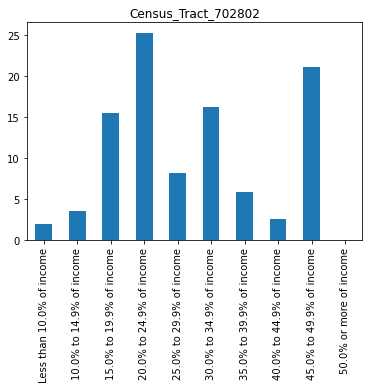

In [34]:
Census_Tract_702802.plot.bar(x='Percent of Income Spent on Gross Rent', y = 'Percent of Households', title = 'Census_Tract_702802')

<AxesSubplot:title={'center':'Census_Tract_702803'}>

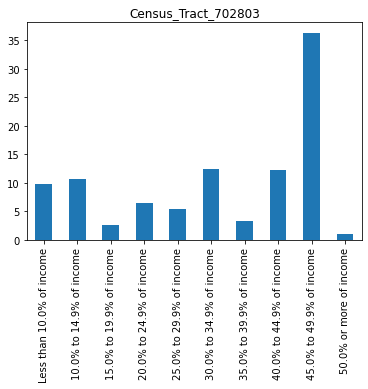

In [35]:
Census_Tract_702803.plot.bar(x='Percent of Income Spent on Gross Rent', 
                             y = 'Percent of Households', title = 'Census_Tract_702803')

<AxesSubplot:title={'center':'Census_Tract_703001'}>

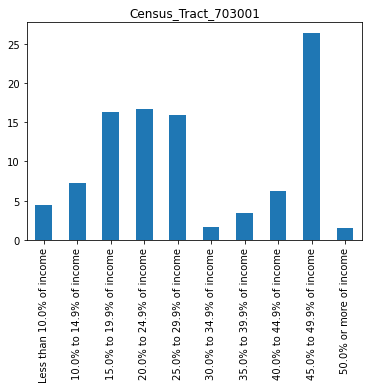

In [36]:
Census_Tract_703001.plot.bar(x='Percent of Income on Gross Rent', 
                             y = 'Percent of Households', title = 'Census_Tract_703001')

**What do we see?:** I was expecting for the data distribution of all the census tracks to look somewhat similar since we are looking at census tracks in the same city. However, they are all very different and the distribution of each is somewhat random. It would be interesting to see why that is.  

## 11. Analyzing Rent Affordability in Culver City 
Let's see which census tracks are the most and least affordable 

The larger percentage of households with a gross rent of less than 30%, the more affordable the rent in the area is. 

In [37]:
# creating new columns. 
grd['Less than 30% of Income'] = grd['Less than 10.0% of income']+grd['10.0% to 14.9% of income']+grd['15.0% to 19.9% of income']+grd['20.0% to 24.9% of income']+grd['25.0% to 29.9% of income']

grd['30% or more of Income'] = grd['30.0% to 34.9% of income']+grd['35.0% to 39.9% of income']+grd['40.0% to 44.9% of income']+grd['45.0% to 49.9% of income']+grd['50.0% or more of income']   



In [38]:
#check to see if columns are there 
grd.sample()

,geoid,name,Total,Less than 10.0%,10.0% to 14.9%,15.0% to 19.9%,20.0% to 24.9%,25.0% to 29.9%,30.0% to 34.9%,35.0% to 39.9%,40.0% to 44.9%,45.0% to 49.9%,50.0% or more,geometry,Less than 10.0% of income,10.0% to 14.9% of income,15.0% to 19.9% of income,20.0% to 24.9% of income,25.0% to 29.9% of income,30.0% to 34.9% of income,35.0% to 39.9% of income,40.0% to 44.9% of income,45.0% to 49.9% of income,50.0% or more of income,Less than 30% of Income,30% or more of Income
5,14000US06037702801,"Census Tract 7028.01, Los Angeles, CA",1311.0,27.0,98.0,169.0,36.0,132.0,220.0,98.0,120.0,411.0,0.0,"MULTIPOLYGON (((-118.41823 34.01211, -118.4179...",2.059497,7.47521,12.890923,2.745995,10.06865,16.781083,7.47521,9.153318,31.350114,0.0,35.240275,64.759725


Lets check our math. The percents in the two new columns should equal 100.  Our math checks out. We can continue.

In [39]:
#Let's define and filter for our new columns
affordability_columns = ['name','Less than 30% of Income','30% or more of Income'].copy()

In [40]:
affordability=grd[affordability_columns]
affordability

,name,Less than 30% of Income,30% or more of Income
0,"Census Tract 7024, Los Angeles, CA",44.720057,55.279943
1,"Census Tract 7025.01, Los Angeles, CA",72.888889,27.111111
2,"Census Tract 7025.02, Los Angeles, CA",56.636005,43.363995
3,"Census Tract 7026, Los Angeles, CA",45.323741,54.676259
4,"Census Tract 7027, Los Angeles, CA",55.140187,44.859813
5,"Census Tract 7028.01, Los Angeles, CA",35.240275,64.759725
6,"Census Tract 7028.02, Los Angeles, CA",54.332553,45.667447
7,"Census Tract 7028.03, Los Angeles, CA",34.872979,65.127021
8,"Census Tract 7030.01, Los Angeles, CA",60.600000,39.400000


In [41]:
#lets sort for the track with the largest percentage of households with a gross rent of less than 30% of income
affordability.sort_values(by='Less than 30% of Income',ascending = False)

,name,Less than 30% of Income,30% or more of Income
1,"Census Tract 7025.01, Los Angeles, CA",72.888889,27.111111
8,"Census Tract 7030.01, Los Angeles, CA",60.600000,39.400000
2,"Census Tract 7025.02, Los Angeles, CA",56.636005,43.363995
4,"Census Tract 7027, Los Angeles, CA",55.140187,44.859813
6,"Census Tract 7028.02, Los Angeles, CA",54.332553,45.667447
3,"Census Tract 7026, Los Angeles, CA",45.323741,54.676259
0,"Census Tract 7024, Los Angeles, CA",44.720057,55.279943
5,"Census Tract 7028.01, Los Angeles, CA",35.240275,64.759725
7,"Census Tract 7028.03, Los Angeles, CA",34.872979,65.127021


Census track 7025.01 is the most affordable and census track 7028.03 is the least affordable. 

## Mapping Rent Affordability in Culver City
Lets map the affordability of the census tracks. We are going to use `Less than 30% of Income` to visualize affordability. As previously mentioned, affordability means you are using less than 30% of income on rent. 

<AxesSubplot:>

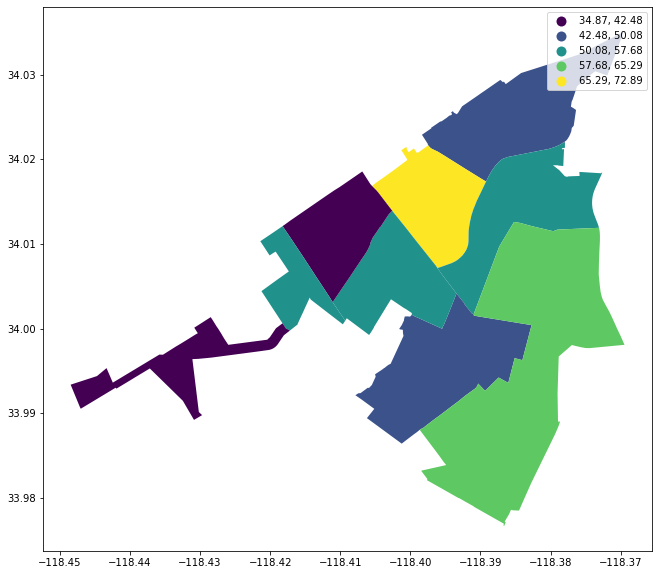

In [42]:
grd.plot(figsize=(12,10),
                 column='Less than 30% of Income',
                 legend=True, 
                 scheme='equal_interval')

Now I want to map the most affordable and least affordable census tracks on a basemap. 

<AxesSubplot:>

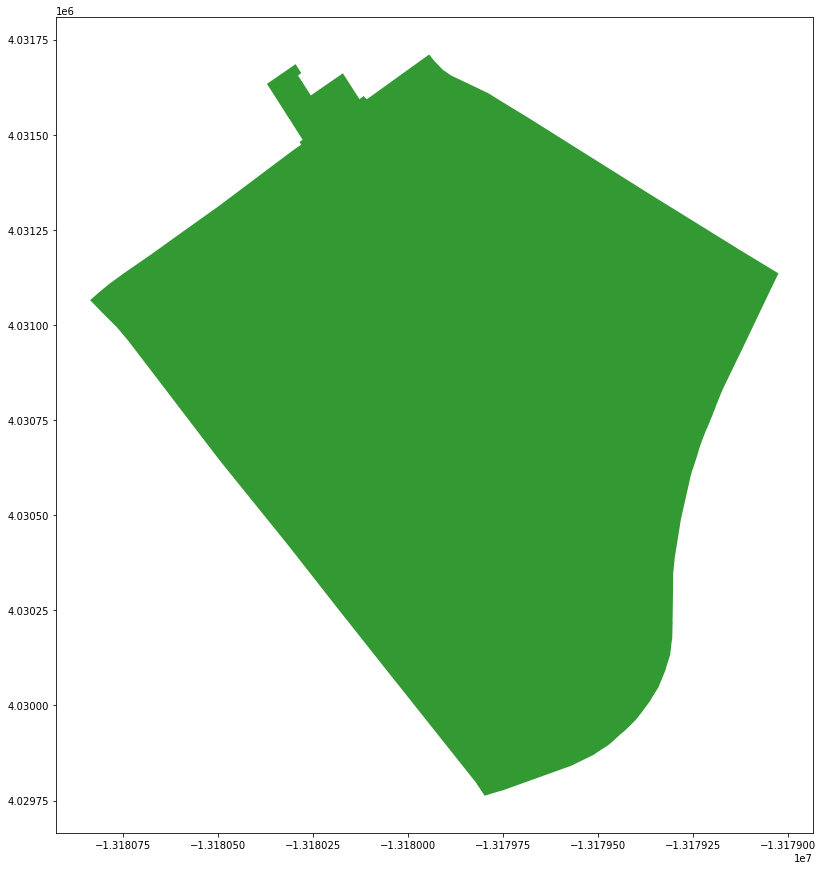

In [43]:
#Let's plot the most affordable 
grd_web_mercator = grd.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(15, 15))
grd_web_mercator[grd_web_mercator['Less than 30% of Income'] > 70].plot(ax=ax, alpha=0.8, color='green')

<AxesSubplot:>

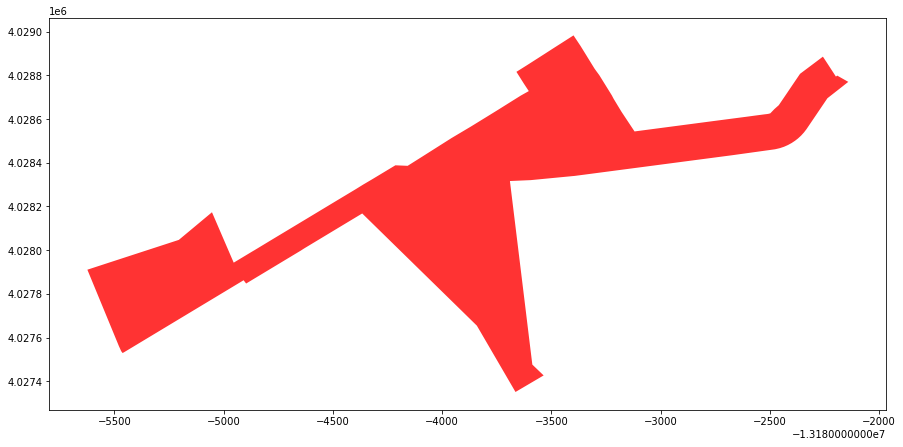

In [44]:
#Let's plot the least affordable 
grd_web_mercator = grd.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(15, 15))
grd_web_mercator[grd_web_mercator['Less than 30% of Income'] < 35].plot(ax=ax, alpha=0.8, color='red')

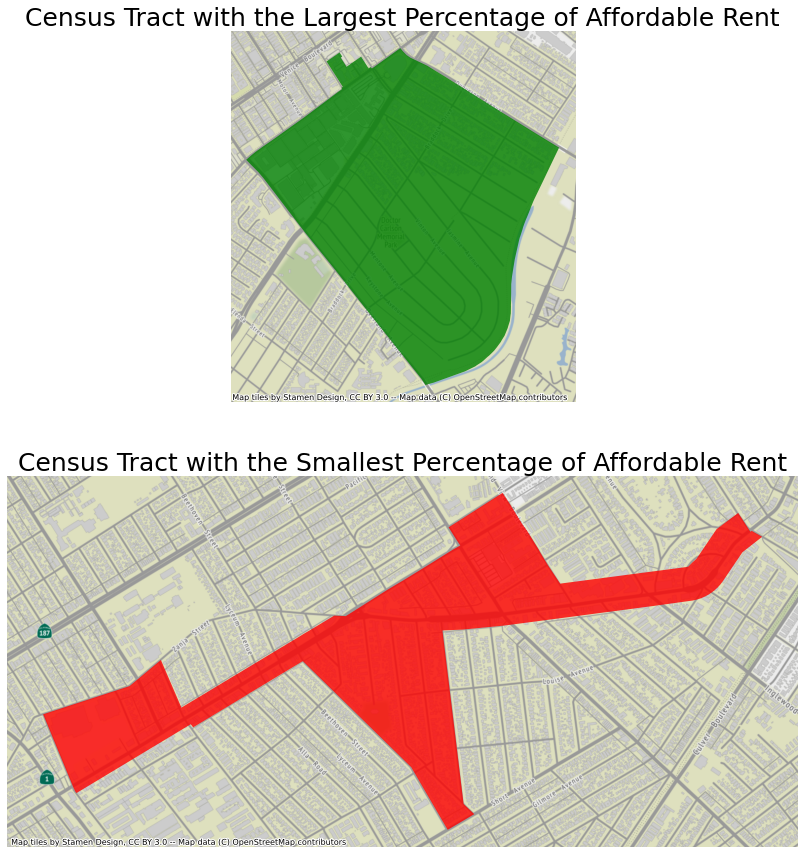

In [45]:
#Bring them together and add basemaps
fig, axs = plt.subplots(2,1, figsize=(15, 15,))
ax1, ax2 = axs
grd_web_mercator[grd_web_mercator['Less than 30% of Income'] >70].plot(ax=ax1, alpha=0.8, color='green')
ax1.axis('off')
ax1.set_title('Census Tract with the Largest Percentage of Affordable Rent', fontsize=25)
ctx.add_basemap(ax1)

grd_web_mercator[grd_web_mercator['Less than 30% of Income'] <35].plot(ax=ax2, alpha=0.8, color='red')
ax2.axis('off')
ax2.set_title('Census Tract with the Smallest Percentage of Affordable Rent', fontsize=25)
ctx.add_basemap(ax2)

There you have it folks. The most and least affordable census tracks in Culver City mapped out for your viewing pleasure